In [1]:
import sca as sca
import numpy as np
import sklearn as sk
import scipy as sp
import matplotlib.pyplot as plt
import time
from sklearn.datasets import fetch_lfw_people

In [2]:
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

In [3]:
y = lfw_people.data
n_samples = y.shape[0]
n_features = y.shape[1]
print(n_samples, n_features)

1288 1850


In [4]:
t0 = time.clock()
stab_maps, dwell_time = sca.recursive_cluster(y.transpose(), n_clusters=20, subsample_size=20, 
                                  n_replications=40, n_jobs=-1, n_states=3)
print(time.clock()-t0, "seconds process time")

[37 -1  5 23 24  9 33  3 59 29 -1 34  1 58 19 42 17 57 31  8 29 -1 31 59
 46 19 41 34 -1 28 57 33  5 12 21 43 27 30 25 23 25 48  1 56 52 29 31 42
 34 13 28  5 42  9 41 37 40 23 55 47 45 48  6  9 34 42 -1 32  3 25 57 55
 22  5 12 17 52 20 21  1 20 49 41  2 51 -1  6 44  9 15  3 37 10 19 17 30
  5 27  4 18 43 32 10 51 53 57 27 37  4  5 18 19  6 13 28 42 24 17 12 47
 29 31 31  1 30  5 47 39  9 32 24 28 57 25 18 35 53 12 19 -1  3 31 35 37
 38 47 49 24 40 32 42 15 43  9 -1 19  6  5 34 18 10  3 19 40  2 52  8 15
 48 50 41 34 37 43  6 18 31 47  9  5 -1 18 48 21 17  3  2 12 38 34 25  5
 20 19 25  9  1 31 -1  6 31  3 34 38 17 -1  1 32 55 22  9  5 25 51 52 20
  6 12 46 42 15 20 39 42 55 17  8 54  2  4  5  9 41 34  1 16 31 59 29 10
 25 41 44 28 43  9 10 -1 30 33  2 57 12 27  0  5 19  6 18 42 38 32 12  0
 15  6  9 41 43 27  3 46 47 31 59  5 17 37 19 16 13 23 43  0 33  9 29 15
 31 12 27  2 58 -1 19 53  5 16 56 28  2  8 41  6 49 59 31 40 17 55 27 33
 28 50 -1  1 42  4  5 15 48 26  2 19 22  5 28 29 -1

In [5]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

In [6]:
n_samples, h, w = lfw_people.images.shape
print(n_samples, h, w)

1288 50 37


In [7]:
dwell_time

array([[0.15 ],
       [0.425],
       [0.5  ],
       [0.425],
       [0.4  ],
       [0.925],
       [0.5  ],
       [0.1  ],
       [0.2  ],
       [0.775],
       [0.35 ],
       [0.125],
       [0.55 ],
       [0.125],
       [0.05 ],
       [0.35 ],
       [0.2  ],
       [0.525],
       [0.475],
       [0.725],
       [0.25 ],
       [0.375],
       [0.225],
       [0.3  ],
       [0.375],
       [0.525],
       [0.225],
       [0.3  ],
       [0.35 ],
       [0.5  ],
       [0.225],
       [0.75 ],
       [0.275],
       [0.2  ],
       [0.575],
       [0.4  ],
       [0.025],
       [0.375],
       [0.325],
       [0.175],
       [0.225],
       [0.375],
       [0.675],
       [0.475],
       [0.2  ],
       [0.025],
       [0.1  ],
       [0.25 ],
       [0.15 ],
       [0.2  ],
       [0.2  ],
       [0.225],
       [0.125],
       [0.2  ],
       [0.075],
       [0.15 ],
       [0.125],
       [0.425],
       [0.075],
       [0.175]])

In [8]:
stab_maps.shape

(1850, 60)

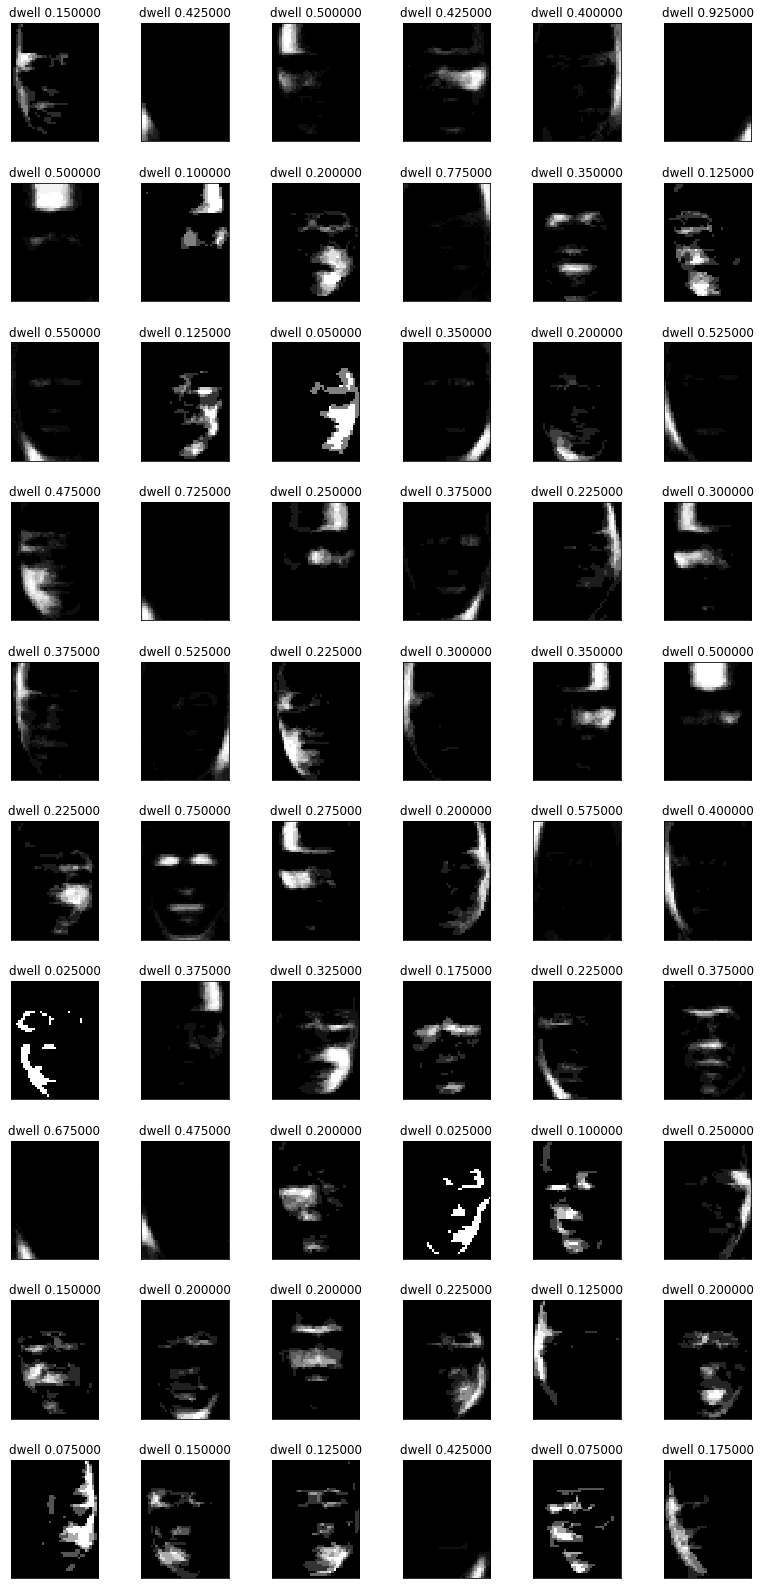

In [9]:
# plot the gallery of the most significative eigenfaces
n_maps = 50
maps_titles = ["dwell %f" % i for i in dwell_time]
plot_gallery(stab_maps.transpose(), maps_titles, h, w, n_row=10, n_col=6)
plt.show()